Modelo para anlisis de sentmientos para luego precedir si tiene sintomas de depresion.

In [2]:
from string import punctuation
import pandas as pd
import nltk
import re
import numpy as np
from datasets import load_metric

In [2]:
# read the data from tweets_public.csv and create a dataframe
df = pd.read_csv('data/tweets_public.csv', encoding='utf-8')
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/r...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City
2,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,945318406441635840,NaN,Madrid
3,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,NaN,Mon Nov 06 14:18:35 +0000 2017,927540721296568320,NaN,Pacific Time (US & Canada)
4,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,947965901332197376,NaN,Buenos Aires


In [3]:
df.shape

(7867, 10)

# Preprocesamiento
Limpieza de datos

In [4]:
# create a new dataframe with only the text and airline_sentiment columns and tweet id with the name df_sentiment
df_sentiment = df[['text', 'airline_sentiment', 'tweet_id']]

In [5]:
# transform the text letters to lowercase
df_sentiment['text'] = df_sentiment['text'].str.lower()
df_sentiment.head()

C:\Users\raula\AppData\Local\Temp\ipykernel_23496\3390815067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['text'] = df_sentiment['text'].str.lower()


,text,airline_sentiment,tweet_id
0,trabajar en #ryanair como #tma: https://t.co/r...,neutral,926419989107798016
1,@iberia @fionaferrer cuando gusten en cancún s...,neutral,934854385577943041
2,sabiais que @iberia te trata muy bien en santi...,negative,945318406441635840
3,nunca nunca nunca pidáis el café de ryanair.\n...,negative,927540721296568320
4,@cris_tortu @dakar @iberia @mitsubishi_es @bfg...,positive,947965901332197376


In [6]:
# Referencia: https://stackoverflow.com/questions/6718633/python-regular-expression-again-match-url
# remove the urls from the text but keep all the text after the url
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: re.split('http[s]*\S+', str(x))[0])
df_sentiment.head()

,text,airline_sentiment,tweet_id
0,trabajar en #ryanair como #tma:,neutral,926419989107798016
1,@iberia @fionaferrer cuando gusten en cancún s...,neutral,934854385577943041
2,sabiais que @iberia te trata muy bien en santi...,negative,945318406441635840
3,nunca nunca nunca pidáis el café de ryanair.\n...,negative,927540721296568320
4,@cris_tortu @dakar @iberia @mitsubishi_es @bfg...,positive,947965901332197376


In [7]:
# remove the punctuation from the text
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: ''.join(c for c in x if c not in punctuation))
df_sentiment.head()

,text,airline_sentiment,tweet_id
0,trabajar en ryanair como tma,neutral,926419989107798016
1,iberia fionaferrer cuando gusten en cancún se ...,neutral,934854385577943041
2,sabiais que iberia te trata muy bien en santia...,negative,945318406441635840
3,nunca nunca nunca pidáis el café de ryanair\nb...,negative,927540721296568320
4,cristortu dakar iberia mitsubishies bfgoodrich...,positive,947965901332197376


In [8]:
# change the \n to a space
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: x.replace('\n', ' '))
df_sentiment.head()

,text,airline_sentiment,tweet_id
0,trabajar en ryanair como tma,neutral,926419989107798016
1,iberia fionaferrer cuando gusten en cancún se ...,neutral,934854385577943041
2,sabiais que iberia te trata muy bien en santia...,negative,945318406441635840
3,nunca nunca nunca pidáis el café de ryanair bu...,negative,927540721296568320
4,cristortu dakar iberia mitsubishies bfgoodrich...,positive,947965901332197376


In [9]:
# remove the stopwrods from the text
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_sentiment.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,airline_sentiment,tweet_id
0,trabajar ryanair tma,neutral,926419989107798016
1,iberia fionaferrer gusten cancún viaja disfrut...,neutral,934854385577943041
2,sabiais iberia trata bien santiago chilete cam...,negative,945318406441635840
3,nunca nunca nunca pidáis café ryanair bueno ve...,negative,927540721296568320
4,cristortu dakar iberia mitsubishies bfgoodrich...,positive,947965901332197376


In [10]:
# remove the emojis from the text

# regular expression pattern to remove emojis from text
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # faces
        u"\U0001F300-\U0001F5FF"  # simbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)

# use lambda function to remove the emojis from the text
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: emoji_pattern.sub(r'', x))
df_sentiment.head()

,text,airline_sentiment,tweet_id
0,trabajar ryanair tma,neutral,926419989107798016
1,iberia fionaferrer gusten cancún viaja disfrut...,neutral,934854385577943041
2,sabiais iberia trata bien santiago chilete cam...,negative,945318406441635840
3,nunca nunca nunca pidáis café ryanair bueno ve...,negative,927540721296568320
4,cristortu dakar iberia mitsubishies bfgoodrich...,positive,947965901332197376


In [11]:
# remove the numbers from the text
df_sentiment.loc[:, 'text'] = df_sentiment['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_sentiment.head()

,text,airline_sentiment,tweet_id
0,trabajar ryanair tma,neutral,926419989107798016
1,iberia fionaferrer gusten cancún viaja disfrut...,neutral,934854385577943041
2,sabiais iberia trata bien santiago chilete cam...,negative,945318406441635840
3,nunca nunca nunca pidáis café ryanair bueno ve...,negative,927540721296568320
4,cristortu dakar iberia mitsubishies bfgoodrich...,positive,947965901332197376


In [12]:
df_sentiment = df[['text', 'airline_sentiment']]
# df_sentiment['label'] = df_sentiment['airline_sentiment'].apply(lambda x: '1 start' if x == 'negative' else '5 stars')
df_sentiment['label'] = df_sentiment['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)
df_sentiment = df_sentiment[['text', 'label']]
df_sentiment

C:\Users\raula\AppData\Local\Temp\ipykernel_23496\4261467530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['label'] = df_sentiment['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)


,text,label
0,Trabajar en #Ryanair como #TMA: https://t.co/r...,1
1,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,1
2,Sabiais que @Iberia te trata muy bien en santi...,0
3,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,0
4,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,1
...,...,...
7862,@Iberia @iberiaexpress especialistas en dejart...,0
7863,"Con @Iberia, mi destino a un solo click. ¡Dese...",1
7864,@Iberia Muy bien. Muchas gracias,1
7865,Es que volar con Ryanair es peor que irte a ch...,0


In [13]:
# save the dataframe to a csv file
df_sentiment.to_csv('data/clean_tweets_sentiment.csv', index=False)

# Hugging Face

In [14]:
model_preload1 = "nlptown/bert-base-multilingual-uncased-sentiment"
# model_preload = "distilbert-base-uncased"
# model_preload = "xlm-roberta-base"
# model_preload = "distilbert-base-multilingual-cased"
# model_preload = "bert-base-multilingual-cased"
model_preload =  'dccuchile/bert-base-spanish-wwm-cased'
# model_preload = "RoBERTa-base"

In [3]:

data = ["Amo el mundo en el que vivo", "Odio a todas las personas que conozco"]

In [16]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9905071258544922},
 {'label': 'NEGATIVE', 'score': 0.9892126321792603}]

In [17]:
sentiment_pipeline('no estoy normal')

[{'label': 'NEGATIVE', 'score': 0.9994358420372009}]

In [18]:
specific_model = pipeline("sentiment-analysis", model=model_preload1)
specific_model(data)

[{'label': '5 stars', 'score': 0.7264281511306763},
 {'label': '5 stars', 'score': 0.6389875411987305}]

In [19]:
specific_model('estoy normal')

[{'label': '3 stars', 'score': 0.3511374890804291}]

In [20]:
specific_model('estoy triste')

[{'label': '1 star', 'score': 0.5364329814910889}]

## Fine tuning

In [21]:
# import torch
# torch.cuda.is_available()

In [22]:
# torch.cuda.empty_cache()

In [23]:
from datasets import load_dataset
local_train = load_dataset("csv", data_files="data/clean_tweets_sentiment.csv", split="train[:70%]")
local_test = load_dataset("csv", data_files="data/clean_tweets_sentiment.csv", split="train[70%:]")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [24]:
print(local_train.shape)
print(local_test.shape)
print(local_train[0])
print(local_test[0])

(5507, 2)
(2360, 2)
{'text': 'Trabajar en #Ryanair como #TMA: https://t.co/ruUArBe1tO #empleo', 'label': 1}
{'text': '@radioledonline @Iberia @lauraluzo Sr. Gallego, por qué no pagáis las indemnizaciones por cancelaciones? Aviación C… https://t.co/pC3cvISmjH', 'label': 0}


In [25]:
small_train_dataset = local_train.shuffle(seed=42).select(
    list(list(range(300)))
)
small_test_dataset = local_test.shuffle(seed=42).select(list(list(range(100))))
# # split df_sentiment in 70% train and 30% test
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(df_sentiment, test_size=0.3, random_state=42)
# train.shape, test.shape

In [26]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_preload)

In [27]:
def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True)

# user the function preprocess_function to tokenize the train and test data
# tokenized_train = train['text'].apply(lambda x: tokenizer(x, truncation=True))
# tokenized_test = test['text'].apply(lambda x: tokenizer(x, truncation=True))
tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [28]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## train the model

In [29]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_preload, num_labels=2, id2label={0: "negative", 1: "positive"})


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [31]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
repo_name = "raulangelj/huggingface_sentiment_analysis"

In [33]:
from transformers import TrainingArguments, Trainer
 
training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=25,
   per_device_eval_batch_size=25,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)
 
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

c:\Users\raula\Documents\GitHub\analisis_sentimientos_depresion\raulangelj/huggingface_sentiment_analysis is already a clone of https://huggingface.co/raulangelj/huggingface_sentiment_analysis. Make sure you pull the latest changes with `repo.git_pull()`.


In [34]:
trainer.train()

c:\Users\raula\Documents\GitHub\analisis_sentimientos_depresion\venv\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: raulangelj (raulangel). Use `wandb login --relogin` to force relogin


  0%|          | 0/24 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'train_runtime': 39.7835, 'train_samples_per_second': 15.082, 'train_steps_per_second': 0.603, 'train_loss': 0.6490575869878134, 'epoch': 2.0}


TrainOutput(global_step=24, training_loss=0.6490575869878134, metrics={'train_runtime': 39.7835, 'train_samples_per_second': 15.082, 'train_steps_per_second': 0.603, 'train_loss': 0.6490575869878134, 'epoch': 2.0})

In [36]:
trainer.evaluate()

{'eval_loss': 0.6537337303161621,
 'eval_accuracy': 0.61,
 'eval_f1': 0.6608695652173914,
 'eval_runtime': 27.9019,
 'eval_samples_per_second': 3.584,
 'eval_steps_per_second': 0.143,
 'epoch': 2.0}

In [37]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/419M [00:00<?, ?B/s]

Upload file runs/Sep15_21-08-54_RAUL_ANGEL/events.out.tfevents.1694833742.RAUL_ANGEL.23496.0:   0%|          |…

Upload file runs/Sep15_21-08-54_RAUL_ANGEL/events.out.tfevents.1694833894.RAUL_ANGEL.23496.1:   0%|          |…

To https://huggingface.co/raulangelj/huggingface_sentiment_analysis
   58b9e45..4f16d68  main -> main

To https://huggingface.co/raulangelj/huggingface_sentiment_analysis
   4f16d68..8d5f00a  main -> main



'https://huggingface.co/raulangelj/huggingface_sentiment_analysis/commit/4f16d68695e9ccd6080f4ec1420f9d4564c8847f'

In [4]:
data

['Amo el mundo en el que vivo', 'Odio a todas las personas que conozco']

# Prueba de modelo

In [3]:
from transformers import pipeline
 
sentiment_model = pipeline(model=repo_name)
sentiment_model(data)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'positive', 'score': 0.5367423892021179},
 {'label': 'negative', 'score': 0.5140738487243652}]

In [4]:
sentiment_model('no me siento bien')

[{'label': 'negative', 'score': 0.5318524837493896}]

In [5]:
sentiment_model('hoy es el mejor dia de mi vida')

[{'label': 'positive', 'score': 0.5589547753334045}]

In [6]:
sentiment_model('ya no puedo con mi vida, no quiero que me hablen')

[{'label': 'negative', 'score': 0.5341178178787231}]

## Prueba con datos obtenidos por participantes

In [9]:
# store the data from prueba-participantes.csv in a dataframe
df = pd.read_csv('data/prueba-participantes.csv', encoding='utf-8')
df.head()

,Text,Label
0,Hoy va a ser un gran dia,1
1,"Hoy estaba mal, pero comí un helado y ya no.",1
2,"Hoy tengo muchas ganas, mucha energía y motiva...",1
3,Hoy probé un nuevo restaurante muy bueno,1
4,"Los días a pesar de ser lluviosos, pueden ser ...",1


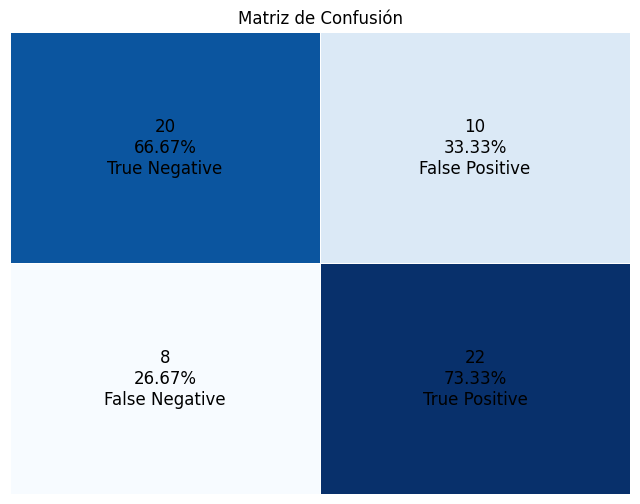

In [24]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
# crear la matriz de confusion usando el modelo de sentiment analysis
from sklearn.metrics import confusion_matrix
y_true = df['Label']
y_pred = []
for i in df['Text']:
   pred = sentiment_model(i)
   new_label = 1 if pred[0]['label'] == 'positive' else 0
   y_pred.append(new_label)
cf_matrix = confusion_matrix(y_true, y_pred)
# Define las etiquetas
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Calcular el total de elementos en cada clase
total_negative = np.sum(cf_matrix[0, :])
total_positive = np.sum(cf_matrix[1, :])

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=False, fmt='', cmap='Blues', linewidths=.5, xticklabels=False, yticklabels=False, cbar=False)
for i, j in itertools.product(range(2), range(2)):
   count = cf_matrix[i, j]
   if i == 0:
       percentage = count / total_negative * 100
   else:
       percentage = count / total_positive * 100
   plt.text(j + 0.5, i + 0.5, f"{count}\n{percentage:.2f}%\n{labels[i * 2 + j]}", ha='center', va='center', fontsize=12)

plt.title('Matriz de Confusión')
plt.show()


In [11]:
# muestra el accuracy del modelo de sentiment analysis
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.7

In [12]:
# muestra el f1 score del modelo de sentiment analysis
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7096774193548386

In [13]:
# muestra el recall del modelo de sentiment analysis
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)


0.7333333333333333

In [14]:
# muestra el precision del modelo de sentiment analysis
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)


0.6875

In [15]:
# muestra el classification report del modelo de sentiment analysis
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.69      0.73      0.71        30

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [16]:
# muestra el classification report del modelo de sentiment analysis
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.714286,0.666667,0.689655,30.0
1,0.687500,0.733333,0.709677,30.0
accuracy,0.700000,0.700000,0.700000,0.7
macro avg,0.700893,0.700000,0.699666,60.0
weighted avg,0.700893,0.700000,0.699666,60.0


## curva roc

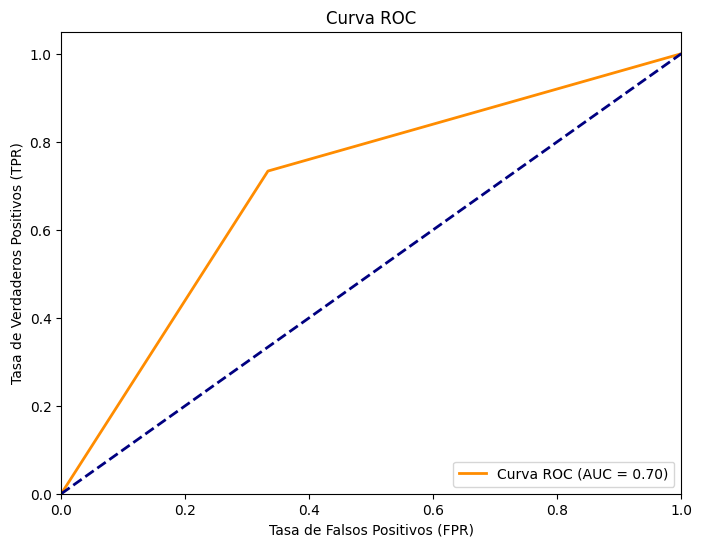

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la gráfica ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# Funcion a utilizar en proyecto

In [158]:
import unicodedata
from transformers import pipeline

def has_first_person_pronouns(text):
    first_person_pronouns = ["yo", "me", "mi", "conmigo"]
    
    words = text.split()
    for word in words:
        normalize_word = remove_accent(word.lower())
        if normalize_word in first_person_pronouns:
            return True
    
    return False

def remove_accent(word):
    return ''.join((c for c in unicodedata.normalize('NFD', word) if unicodedata.category(c) != 'Mn'))

# ? should we use this?
def has_depression_words(text):
    depression_words = [
        "depresion", "tristeza", "desesperanza", "desmotivacion", "soledad", "ansiedad",
        "desgano", "desanimo", "desaliento", "abatimiento", "melancolia", "desolacion",
        "apatia", "angustia", "pesimismo", "desesperacion", "desamparo", "desconsuelo",
        "agotamiento", "cansancio", "desinteres", "insomnio", "culpa", "llanto", "suicidio",
        "autolesion", "desorden", "trastorno", "descontrol", "vacio", "apetito", "fatiga",
        "inutilidad", "retroceso", "preocupacion", "retraimiento", "negatividad", "desvalorizacion",
        "desesperado", "desesperanza", "perdida", "esperanza", "autoestima", "autoestima",
        "irritabilidad", "decision", "concentracion", "motivacion", "indefension", "vida",
        "conexion", "pena", "abandono", "inseguridad", "desapego", "agonia", "miedo", "rumiacion",
        "tratamiento", "terapia", "psicologo", "psiquiatra", "medicacion", "cura", "superacion",
        "autoayuda", "apoyo", "rehabilitacion", "poca esperanza", 'fracaso', 'culpa', 'falta de sentido', ' castigo', 'inconforme',
        'inconformidad', 'daño', 'muerte', 'llorar', 'desinteres', 'indesicion', 'no puedo trabajar', 'no me puedo concentrar', 'concentrar', 'no puedo dormir', 'cansancio','odio', 'odiaba', 'odie', 'odiare', 'odiaria', 'odiase', 'odiamos',
        'depresion', 'depresión', 'morir', 'morirnos', 'morirme', 'morirte', 'morirse', 'morimos', 'morirnos', 'morirnos',
        'morirse'
    ]
    
    words = text.split()
    for word in words:
        normalize_word = remove_accent(word.lower())
        if normalize_word in depression_words:
            return True
    
    return False

def has_possible_depression_sintom(text):
    # To know if has depression sintoms, we will check 3 things:
    # 1. If the text has first person pronouns
    # 2. If the text has negative sentiment
    # 3. If the text has words related to depression
    # If the text has the 3 things, we will say that the text has depression sintoms
    # If the text has 2 of the 3 things, we will say that the text has possible depression sintoms
    # If the text has 1 of the 3 things, we will say that the text has no depression sintoms
    sentiment_model = pipeline(model="raulangelj/huggingface_sentiment_analysis")
    is_negative_sentiment = sentiment_model(text)[0]['label'] == 'negative'
    # sentiment_model(data)
    is_depression_words = has_depression_words(text)
    is_first_person_pronouns = has_first_person_pronouns(text)
    # if all the conditions are true, then the text has depression sintoms
    # if ((is_negative_sentiment and is_depression_words) or is_first_person_pronouns) or (is_depression_words and is_first_person_pronouns) or (is_negative_sentiment and is_first_person_pronouns):
        # return 'depression'
    if is_negative_sentiment and is_depression_words and is_first_person_pronouns:
        return True
    # if 2 of the 3 conditions are true, then the text has possible depression sintoms
    if (is_negative_sentiment and is_depression_words) or (is_negative_sentiment and is_first_person_pronouns):
        # return 'possible_depression'
        return True
    # if (is_negative_sentiment and is_depression_words) or (is_negative_sentiment and is_first_person_pronouns) or (is_depression_words and is_first_person_pronouns):
    #     # return 'possible_depression'
    #     return True
    # if 1 of the 3 conditions are true, then the text has no depression sintoms
    if is_negative_sentiment or is_depression_words or is_first_person_pronouns:
        # return 'no_depression'
        return False
    # if none of the conditions are true, then the text has no depression sintoms
    # return 'no_depression'
    return False

In [159]:
example_text_depression = "Últimamente, me cuesta encontrar motivación para levantarme de la cama por las mañanas. Siento una tristeza constante que no puedo sacudir, como si estuviera atrapado en una nube gris. Incluso las actividades que solían traerme alegría ahora me resultan abrumadoras y sin sentido. Me siento agotado todo el tiempo, tanto física como emocionalmente. La soledad se ha convertido en mi compañera constante, y me resulta difícil conectar con los demás. No puedo evitar sentir que he perdido el control de mi vida y que no hay esperanza de que las cosas mejoren. Estos pensamientos negativos y la sensación de vacío me invaden, y a veces me encuentro llorando sin razón aparente. Me preocupa que estos sentimientos persistan y no sé qué hacer para superar esta desesperanza abrumadora."
example_text_no_depression = "El sol brilla radiante en el cielo azul mientras disfruto de un paseo por el parque. Río y converso con mis amigos, sintiéndome lleno de energía y entusiasmo. Me siento agradecido por las bendiciones en mi vida y tengo metas emocionantes que persigo con determinación. Cada día es una oportunidad para crecer, aprender y disfrutar de las pequeñas cosas que hacen que la vida sea maravillosa. Me rodeo de personas positivas que me apoyan y me animan en mis sueños. La vida es un viaje emocionante y estoy emocionado de ver lo que el futuro me depara."
example_text_no_depression_sad = "Atravesé un momento difícil en mi vida recientemente. Experimenté una pérdida personal significativa que me dejó con el corazón apesadumbrado. Durante un tiempo, sentí una profunda tristeza y una sensación de vacío en mi interior. Sin embargo, me permití sentir y procesar estas emociones, encontrando consuelo en el amor y el apoyo de mis seres queridos. Poco a poco, comencé a encontrar la paz dentro de mí y a enfocarme en las cosas positivas que todavía tengo en mi vida. Aprendí a apreciar más cada momento y a encontrar la fortaleza para seguir adelante. Aunque todavía tengo momentos de tristeza, también encuentro alegría y esperanza en las pequeñas cosas de la vida. La adversidad me ha enseñado a ser más resiliente y a valorar cada experiencia, tanto positiva como negativa."
print(has_possible_depression_sintom(example_text_depression))
print(has_possible_depression_sintom(example_text_no_depression))
print(has_possible_depression_sintom(example_text_no_depression_sad))

True
False
False


# Prueba con datos obtenidos con participantes

In [226]:
# Obtenemos los datos de prueba de prueba-participantes.csv y los guardamos en un dataframe
df = pd.read_csv('data/prueba-participantes.csv', encoding='utf-8')
# filtramos solamente los que sean lable 1 
df = df[df['Label'] == 1]
# Al ser positivos sabemos que no tienen depresion, por lo tanto cambiamos el label a 0
df['Label'] = 0
# Obtenes los textos que si sugieren depresion del archivo spanish_tweets_suggesting_signs_of_depression_v1 y los ponemos en otro dataframe
df_depression = pd.read_csv('data/spanish_tweets_suggesting_signs_of_depression_v1.csv', encoding='utf-8')
# dejamos solo la columna TWEET_TEXT
df_depression = df_depression[['TWEET_TEXT']]
# Le cambiamos el nombre de "TWEET_TEXT" a "Text"
df_depression = df_depression.rename(columns={'TWEET_TEXT': 'Text'})
# Agreamos la columna "Label" y le colocamos valor 1
df_depression['Label'] = 1
# Obtenemos los ultimos 60 tweets que sugieren depresion
df_depression = df_depression.tail(30)
# df_depression = df_depression.tail(30)
# unimos los dos dataframes
df = pd.concat([df, df_depression])

In [227]:
# para cada uno de los textos del datframe lo pasamos por la funcion has_possible_depression_sintom y imprime el resultado y su label
for i in df['Text']:
    # si el label es 1
    if df[df['Text'] == i]['Label'].values[0] == 1:
        print(has_possible_depression_sintom(i), df[df['Text'] == i]['Label'].values[0], i)

False 1 Maduré desde el 2015 a ahora, pero estoy todavía más deprimida.
True 1 Me siento tan desprotegida.
False 1 Siento la necesidad de lastimarme, que mierda loco estoy tan cansada de sentirme así, no quiero más esto
True 1 Estoy muy sensible últimamente no me soporto
True 1 Estoy tan harta que ni llorar me sale pero tengo tanta rabia y tristeza que mejor me voy a dormir, así evito mandarme cagadas
False 1 Que mal me hace todo que mal me hace todo que mal me hace todo que mal me hace todo
False 1 Tengo que hacer varias cosas pero no tengo nada de energía y encima estoy triste
False 1 Trato de no pensar en cosas feas para estar al menos un poquito bien pero aunque no piense el sentimiento de tristeza y vacío nunca se va
False 1 No sé q estoy esperando para matarme
True 1 Que insoportable es mi existencia
False 1 Me siento tan hundida, tan incapaz, me da tanta rabia ser yo, tanta impotencia no poder
False 1 Que asco existir
False 1 Me siento como si fuera a estallar.Todo el estrés, la

In [228]:
# guarda en d los textos que tienen depresion en un arreglo
d = df[df['Label'] == 1]['Text']
# muestra el primer texto, su label y el resultado de la funcion has_possible_depression_sintom
print(d.values[0], df[df['Text'] == d.values[0]]['Label'].values[0], has_possible_depression_sintom(d.values[0]))

Maduré desde el 2015 a ahora, pero estoy todavía más deprimida. 1 False


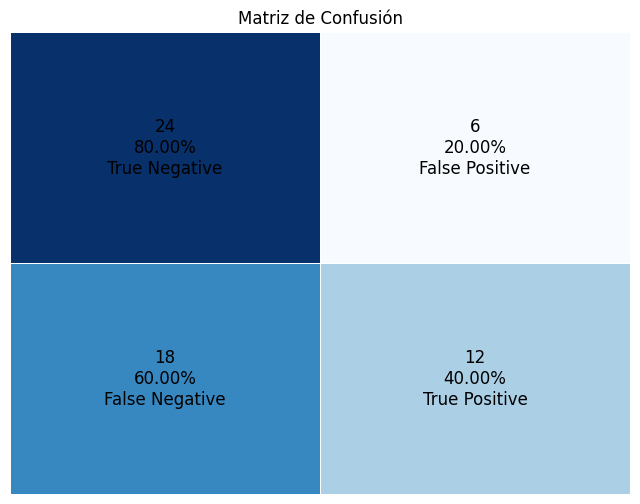

In [229]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# crear la matriz de confusion usando la funcion "has_possible_depression_sintom" para evaluacr los textos
y_true = df['Label']
y_pred = []
for i in df['Text']:
   pred = has_possible_depression_sintom(i)
   y_pred.append(pred)
cf_matrix = confusion_matrix(y_true, y_pred)
# Define las etiquetas
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Calcular el total de elementos en cada clase
total_negative = np.sum(cf_matrix[0, :])
total_positive = np.sum(cf_matrix[1, :])

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=False, fmt='', cmap='Blues', linewidths=.5, xticklabels=False, yticklabels=False, cbar=False)
for i, j in itertools.product(range(2), range(2)):
   count = cf_matrix[i, j]
   if i == 0:
       percentage = count / total_negative * 100
   else:
       percentage = count / total_positive * 100
   plt.text(j + 0.5, i + 0.5, f"{count}\n{percentage:.2f}%\n{labels[i * 2 + j]}", ha='center', va='center', fontsize=12)

plt.title('Matriz de Confusión')
plt.show()

In [230]:
# muestra el accuracy del modelo de depression sintoms
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.6

In [231]:
# muestra el f1 score del modelo de depression sintoms
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.5

In [232]:
# muestra el recall del modelo de depression sintoms
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.4

In [233]:
# muestra la precision del modelo de depression sintoms
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6666666666666666

In [234]:
# muestra el classification report del modelo de depression sintoms
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        30
           1       0.67      0.40      0.50        30

    accuracy                           0.60        60
   macro avg       0.62      0.60      0.58        60
weighted avg       0.62      0.60      0.58        60

